In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
my_df = pd.DataFrame(digits.data, columns=digits.feature_names)
my_df['target'] = digits.target
my_df

In [15]:
inputs = my_df.drop(columns=['target'])
target = my_df['target']
inputs.shape, target.shape

((1797, 64), (1797,))

In [16]:
#Splitting the datasets into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training data sets: ", inputs_train.shape, target_train.shape)
print("Testing data sets: ", inputs_test.shape, target_test.shape)

Training data sets:  (1437, 64) (1437,)
Testing data sets:  (360, 64) (360,)


In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the data on teh training datasets
grid_search.fit(inputs_train, target_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [20]:
# Use the model to find the predicted values using test data
target_pred = best_model.predict(inputs_test)
target_pred.shape, target_test.shape

((360,), (360,))

Model accuracy score:  0.9861111111111112
Model precision score:  0.9869231476374335
Model f1 score:  0.9877420250981895
Model recall score:  0.9887199197860962


Text(33.22222222222222, 0.5, 'Predicted')

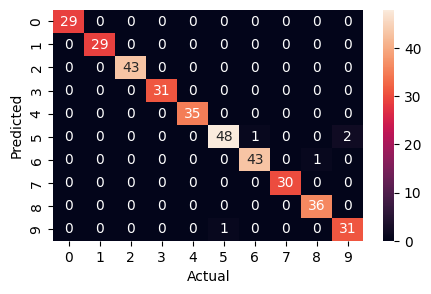

In [21]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred, average='macro'))
print("Model f1 score: ", f1_score(target_test, target_pred, average='macro'))
print("Model recall score: ", recall_score(target_test, target_pred, average='macro'))
#print("Model roc-auc score: ", roc_auc_score(target_test, target_pred, average='macro'))
#print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")